In [3]:
"""import os
import pickle
import sys

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import tabulate
from autorank import autorank, create_report, plot_stats
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import MultipleLocator"""
import typing
import ydata_profiling
import matplotlib.pyplot as plt
from models import model,bt_plot
from dataset_management import get_dataset,convert_to_autorank
import autorank
import numpy as np
import pandas as pd
from models import Lmer,cd_diagram, ci_plot
from scipy import stats
from scipy.stats import rankdata,t,norm,studentized_range
from dataset_management import get_dataset

pd.set_option("chained_assignment", None)
pd.set_option("display.max_rows", 5000)
pd.set_option("display.max_columns", 5000)
pd.set_option("display.width", 10000)



In [15]:
algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity";loss="normalized_regret"
data=get_dataset(dataset_name="fig5_full")
data=data.loc[data[budget]==5]
print(autorank.create_report(autorank.autorank(convert_to_autorank(data))))
print(convert_to_autorank(data)["PB"].median())
print(convert_to_autorank(data)["HB"].mean())
print(convert_to_autorank(data)["RS"].mean())

✅ Loading data done                                                                                 
The statistical analysis was conducted for 3 populations with 2000 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We rejected the null hypothesis that the population is normal for the populations RS (p=0.000), HB (p=0.000), and PB (p=0.000). Therefore, we assume that not all populations are normal.
Because we have more than two populations and the populations and some of them are not normal, we use the non-parametric Friedman test as omnibus test to determine if there are any significant differences between the median values of the populations. We use the post-hoc Nemenyi test to infer which differences are significant. We report the median (MD), the median absolute deviation (MAD) and the mean rank (MR) among all populations over the samples. Differences between populations are significant, if the difference of the mean rank is greater than the critical

In [10]:
print(model("value~algorithm",data).post_hoc("algorithm"))

P-values adjusted by tukey method for family of 3 estimates
(  algorithm  Estimate  2.5_ci  97.5_ci     SE      DF
1        PB     1.794   1.650    1.937  0.073  6000.0
2        RS     2.061   1.917    2.204  0.073  6000.0
3        HB     1.998   1.855    2.142  0.073  6000.0,   Contrast  Estimate  2.5_ci  97.5_ci     SE      DF  T-stat  P-val Sig
1  PB - RS    -0.267  -0.509   -0.025  0.103  6000.0  -2.582  0.027   *
2  PB - HB    -0.205  -0.447    0.038  0.103  6000.0  -1.978  0.118    
3  RS - HB     0.062  -0.180    0.305  0.103  6000.0   0.604  0.818    )


In [12]:
mod=model(f"normalized_regret~used_fidelity",data)

boundary (singular) fit: see help('isSingular') 



Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: normalized_regret~used_fidelity+(1|dummy)

Family: gaussian	 Inference: parametric

Number of observations: 3339050	 Groups: {'dummy': 2.0}

Log-likelihood: 640046.742 	 AIC: -1280085.484

Random effects:

                 Name   Var  Std
dummy     (Intercept)  0.00  0.0
Residual               0.04  0.2

No random effect correlations specified

Fixed effects:

               Estimate  2.5_ci  97.5_ci   SE         DF    T-stat  P-val  Sig
(Intercept)       0.290   0.290    0.290  0.0  3339050.0  1794.371    0.0  ***
used_fidelity    -0.013  -0.013   -0.013  0.0  3339050.0  -827.856    0.0  ***


<AxesSubplot: xlabel='Estimate'>

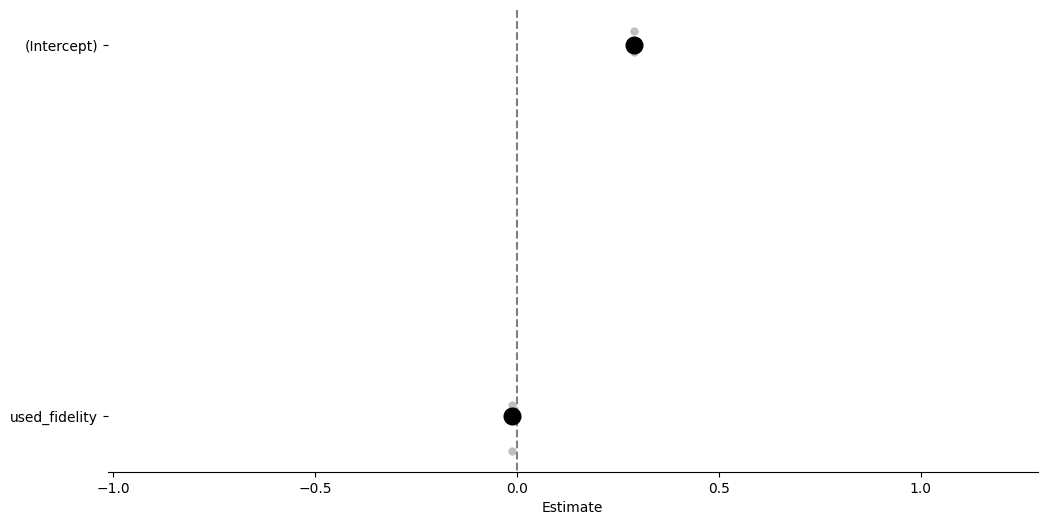

In [21]:
# mod.plot(param="used_fidelity")
print(mod.summary())
mod.plot_summary()